# Fall 2025 Week 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import all the functions from the Utility_functions.py file
from Utility_functions import *

## Applied Interest Rate Analysis

- Ultimately, the practical purpose of investment science
is to improve the investment process
- This process includes identification, selection,
combination, and ongoing management within the
economic life of an individual, corporation, or
government


## Several Scenarios:

- Capital Budgeting: The capital allocation problem consists of allocating a
(usually fixed) budget among several investments or
projects
- Optimal Portfolios: An optimal portfolio is a methodically assembled group
of financial securities with desirable properties. We consider only portfolios of fixed-income securities
with streams of deterministic future cash flows
- Dynamic Cash Flow Processes: To produce excellent results, many investments require
deliberate ongoing management. Mathematically optimal management decisions must
be actively made at every opportunity
- Optimal Management



### The difference between Capital Budgeting and Optimal Portfolios
- Capital budgeting often refers to allocation among projects or investments for which there are not well-established markets and where the projects are lumpy in that they each require discrete lumps of cash. Mathematically, we want to solve the following optimization problem (Projects are independent):
$$ \left\{ 
    \begin{aligned}
    &\text{Maximize} \sum_{i=1}^m b_i x_i\\
    &\text{subject to} \sum_{i=1}^m c_i x_i \leq C\\
    & x_i = 0 \text{ or } 1 \text{ for }i=1,2,3,...
    \end{aligned}
    \right. $$

- Optimal Portfolios, however, the assets are freely traded in the market. Thus, any number of shares can be applied. Here we only consider the portfolios of fixed income securities. For example, if you want to fullfill a stream of obligation $(y_1,...,y_n)$. You want to buy a combination of bonds, then we need to solve:
$$\left\{
    \begin{aligned}
    &\text{Minimize} \sum_{i=1}^m p_i x_i\\
    &\text{subject to} \sum_{i=1}^m c_{ij}x_i \geq y_j \text{ for all }j\\
    & x_i \geq 0
    \end{aligned}
    \right. $$

### Dynamic Cash Flow processes:
Consider all the outcomes and compute the optimal
Example 5.4 (Fishing Problem)

## Exercise 5.1
(Capital budgeting) A firm is considering funding several proposed projects that have the financial properties shown in the following table. The available budget is 600,000. What set of projects would be recommended by the approximate method based on benefit-cost ratios? What is the optimal set of projects?

| Project | Outlay (in 1,000) | Present Worth |
|---------|-------------------|---------------|
| 1       | 100               | 200           |
| 2       | 300               | 500           |
| 3       | 200               | 300           |
| 4       | 150               | 200           |
| 5       | 150               | 250           | 

### Solution:
We can compute the benefit-cost ratios:


In [2]:
present_worth = [200, 500, 300, 200, 250]
outlay = [100, 300, 200, 150, 150]

# Compute the ratio
ratio = [present_worth[i] / outlay[i] for i in range(len(present_worth))]

print(ratio)


[2.0, 1.6666666666666667, 1.5, 1.3333333333333333, 1.6666666666666667]


We need to choose 1, 2, 5.


We run this following code for the linear optimization problem:

In [10]:
from scipy.optimize import linprog
obj = [-200, -500, -300, -200, -250]
lhs_ineq = [[100, 300, 200, 150, 150]]
rhs_ineq = [600]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, integrality = [1,1,1,1,1], bounds = [(0,1)])
opt.x

array([1., 1., 1., 0., 0.])

In [ ]:
# 0–1 knapsack via dynamic programming for Exercise 5.1
present_worth = [200, 500, 300, 200, 250]  # value
outlay =        [100, 300, 200, 150, 150]  # weight
budget = 600

n, W = len(outlay), budget
dp = [[0]*(W+1) for _ in range(n+1)]
take = [[False]*(W+1) for _ in range(n+1)]

for i in range(1, n+1):
    c, v = outlay[i-1], present_worth[i-1]
    for w in range(W+1):
        # not take
        dp[i][w] = dp[i-1][w]
        # take if fits
        if c <= w:
            val = dp[i-1][w-c] + v
            if val > dp[i][w]:
                dp[i][w] = val
                take[i][w] = True

# reconstruct chosen items
w = W
chosen = []
for i in range(n, 0, -1):
    if take[i][w]:
        chosen.append(i)  # 1-based index
        w -= outlay[i-1]
chosen.sort()

total_cost = sum(outlay[i-1] for i in chosen)
total_pw = sum(present_worth[i-1] for i in chosen)

print("DP optimal selection:", chosen, "| Cost:", total_cost, "| PW:", total_pw)


DP optimal selection: [1, 2, 3] | Cost: 600 | PW: 1000


This strategy will use the entire budget.

## Exercise 5.2
(County transportation choices) Suppose that the goals and specific projects shown in the table are being considered by the County Transportation Authority. The total available budget is 5 million.

|                                 | Cost (in 1000) | NPV (in 1000) |
|---------------------------------|----------------|---------------|
| - Road between Augen and Burger |                |               | 
| 1. Concrete, 2 lanes            | 2000           | 4000          |
| 2. Concrete, 4 lanes            | 3000           | 5000          |
| 3. Asphalt, 2 lanes             | 1500           | 3000          |
| 4. Asphalt, 4 lanes             | 2200           | 4300          |
| - Bridge at Cay Road            |                |               | 
| 5. Repair existing              | 500            | 1000          |
| 6. Add lane                     | 1500           | 1500          |
| 7. New Structure                | 2500           | 2500          |
| - Traffic Control in Downsberg  |                |               | 
| 8. Traffic lights               | 100            | 300           |
| 9. Turn Lanes                   | 600            | 1000          |
| 10. Underpass                   | 1000           | 2000          |

The bridge at Cay Road is actually part of the road between Augen and Burger. Therefore it is not reasonable for the bridge to have fewer lanes than the road itself. This means that if projects 2 or 4 are carried out, either projects 6 or 7 must also be carried out. Formulate a zero—one programming problem that includes this additional requirement. Solve the problem.      

### Solution:
The projects are interdependent, so we need to pay more attention.

Suppose $x_i\in\{0,1\}$ denotes either we choose project $i$ or not. Then, we would like to maximize 
$$4000x_1+5000x_2+\cdots+2000x_{10}$$
subject to the constraints
$$\begin{align}
2000x_1+3000x_2+\cdots + 1000x_{10} &\leq 5000 \\
x_1+x_2+x_3+x_4 &\leq 1 \\
x_5+x_6+x_7 &\leq 1 \\
x_8+x_9+x_{10} &\leq 1 \\
-x_6-x_7+x_2+x_4 &\leq 0
\end{align}$$

Note that the last condition is saying that if $x_2+x_4 = 1$ (i.e, project 2 or 4 are carried out), then $x_6+x_7 = 1$ (i.e, project 6 or project 7 must be carried out)

We run the following program so solve this linear programming problem. We see that it is most optimal to select project 4, 6, 10. The net cost is 4700,000 and NPV is 7800,000

In [11]:
from scipy.optimize import linprog
obj = [-4000, -5000, -3000, -4300, -1000, -1500, -2500, -300, -1000, -2000]
lhs_ineq = [[2000, 3000, 1500, 2200, 500, 1500, 2500, 100, 600, 1000], [1,1,1,1,0,0,0,0,0,0], [0,0,0,0,1,1,1,0,0,0], [0,0,0,0,0,0,0,1,1,1], [0,1, 0, 1, 0, -1, -1, 0, 0, 0]]
rhs_ineq = [5000, 1, 1, 1, 0]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, integrality = [1,1,1,1,1,1,1,1,1,1], bounds = [(0,1)])
opt.x

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])

## Exercise 5.3
(Two-period budget) A company has identified a number of promising projects, as indicated in Table 5.7. The cash flows for the first 2 years are shown (they are all negative). The cash flows in later years are positive, and the net present value of each project is shown. The company managers have decided that they can allocate up to 250,000 in each of the first 2 years to fund these projects. If less than 250,000 is used the first year, the balance can be invested at 10% and used to augment the next year’s budget. Which projects should be funded?

| project | 1   | 2    | NPV |
|---------|-----|------|-----|
| 1       | -90 | -58  | 150 |
| 2       | -80 | -80  | 200 |
| 3       | -50 | -100 | 100 |
| 4       | -20 | -64  | 100 |
| 5       | -40 | -50  | 120 |
| 6       | -80 | -20  | 150 |
| 7       | -80 | -100 | 240 |

### Solution:
We first convert the problem to a linear programing problem. Suppose $x_i\in \{0,1\}$ denotes either we select project $i$ or not. Let $y\geq 0$ denote the surplus of the funds in year 1. Then, we would like to maximize 
$$150x_1+200x_2+\cdots+240x_7$$
subject to the constraints
$$90x_1+80x_2+\cdots+80x_7+y\leq 250$$
$$58x_1+80x_2+\cdots+100x_7 \leq 250 + 1.1y$$
We run the following program to solve this linear programming problem. We see that it is most optimal to select project 4,5,6,7

In [15]:
obj = [-150, -200, -100, -100, -120, -150, -240,0]
lhs_ineq = [[90, 80, 50, 20, 40, 80, 80, 1], [58, 80, 100, 54, 50, 20, 100, -1.1], [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0]]
rhs_ineq = [250, 250, 1, 1, 1, 1, 1, 1, 1]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, integrality = [1,1,1,1,1,1,1,0])
opt.x

array([0.       , 0.       , 0.       , 1.       , 1.       , 1.       ,
       1.       , 1.9047619])

## Exercise 5.4
(Bond matrix) The cash matching and other problems can be conveniently represented in matrix form. Suppose there are m bonds. We define for each bond j its associated yearly cash flow stream (column) vector $\vec{c_j}$, which is n-dimensional. The yearly obligations are likewise represented by the n-dimensional vector $\vec{y}$. We can stack the $c_j$ vectors side by side to form the columns of a bond matrix C. Finally we let $\vec{p}$ and $\vec{x}$ be m-dimensional column vectors. The cash matching problem can be expressed as
$$\text{minimize } \vec{p}^T\vec{x}$$
$$\text{subject to } \begin{align}&C\vec{x} > \vec{y} \\ &\vec{x}\geq 0\end{align}$$
- (a) Identify $C,\vec{y},\vec{p}$ and $\vec{x}$ in table 5.3  
- (b) Show that if all bonds are priced according to a common term structure of interest rates, there is a vector $\vec{v}$ satisfying
$$C^T\vec{v}= \vec{p}$$
What are the components of $\vec{v}$? 
- (c) Suppose $\vec{b}$ is a vector whose components represent obligations in each period. Show that a portfolio $\vec{x}$ meeting these obligations exactly satisfies $C\vec{x} =\vec{b}$. 
- (d) With $\vec{x}$ and $\vec{v}$ defined as before, show that the price of the portfolio $\vec{x}$ is $\vec{v}^T\vec{b}$. Interpret this result.


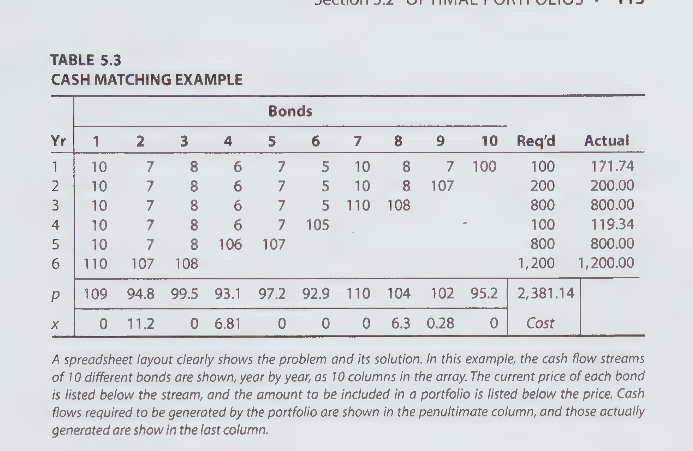



### Solution:
- (a) $C = \begin{bmatrix}10 & 7 & 8 & 6 & 7 & 5 & 10 & 8 & 7 & 100 \\
10 & 7 & 8 & 6 & 7 & 5 & 10 & 8 & 107 & 0 \\ 
10 & 7 & 8 & 6 & 7 & 5 & 110 & 108 & 0 & 0 \\
10 & 7 & 8 & 6 & 7 & 105 & 0 & 0 & 0 & 0 \\
 10 & 7 & 8 & 106 & 107 & 0 & 0 & 0 & 0 & 0 \\
  110 & 107 & 108 & 0 & 0 & 0 & 0 & 0 & 0 & 0\end{bmatrix}$, $\vec{y} = \begin{bmatrix}100 \\ 200 \\ 800 \\ 100 \\ 800 \\ 1200\end{bmatrix}, \vec{p} = \begin{bmatrix}109\\ 94.8 \\ 99.5 \\ 93.1 \\ 97.2 \\ 92.9 \\ 110 \\ 104 \\ 102 \\ 95.2\end{bmatrix}, \vec{x} = \begin{bmatrix}0 \\ 11.2 \\ 0 \\ 6.81 \\ 0 \\ 0 \\ 0 \\ 6.3 \\ 0.28 \\ 0\end{bmatrix}$
  
- (b) If bonds are priced according to term structure $(s_1, s_2,\ldots, s_n)$ where $s_i$ is spot rates at year $i$. Then we define the vector $\vec{v} = (d_1,\ldots, d_n)$ where $d_j = \frac{1}{(1+s_j)^j}$. Then the price of the bond $i$, which has cashflow $\vec{c_i}$ is computed by 
$$p_i = c_{i1}d_1+c_{i2}d_2+\cdots+c_{in}d_n = \vec{c_i}^T\vec{v}.$$
Hence, we have 
$$\vec{p} = C^T\vec{v}$$
The components of $\vec{v}$ are the discount factors $d_i$. 

- (c) This is directly from the definition. The $i$-th entry of $C\vec{x}$ is the cashflow of this portfolio at year $i$. 

- (d) The price of this portfolio is $\vec{x}^T\vec{p} = \vec{x}^T(C^T\vec{v}) = (C\vec{x})^T\vec{v} = \vec{b}^T\vec{v} = \vec{v}^T\vec{b}$. 

This result means that if the cashflow of this portfolio equals the obligation. Then the value of this portfolio is exactly the present value of the obligation. 


## Exercise 5.5
(Trinomial lattice) A trinomial lattice is a special case of a trinomial tree. From each node three moves are possible: up, middle, and down. The special feature of the lattice is that certain pairs of moves lead to identical nodes two periods in the future. We can express these equivalences as:
- up-down = down-up = middle-middle
- middle-down = down-middle
- middle-up = up-middle

Draw a trinomial lattice spanning three periods. How many nodes does it contain? How many nodes are contained in a full trinomial tree of the same number of periods?

### Solution:

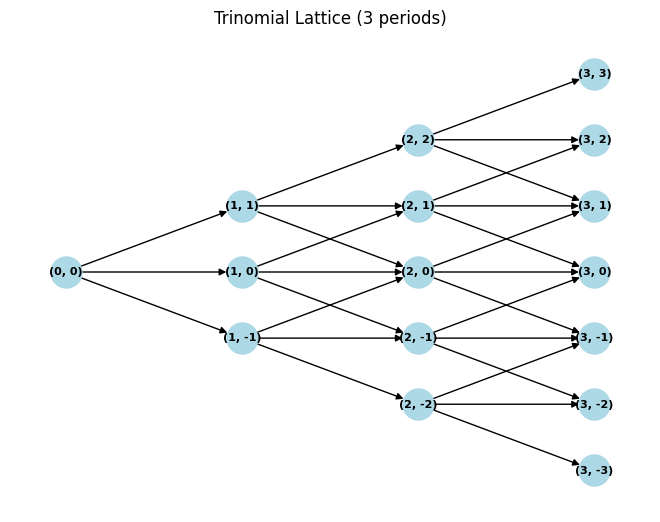

Number of nodes in the trinomial lattice: 16
Number of nodes in a full trinomial tree: 40


In [16]:


import networkx as nx
import matplotlib.pyplot as plt

def draw_trinomial_lattice(periods):
    G = nx.DiGraph()
    nodes = {}
    node_count = 0

    # Create nodes
    for t in range(periods + 1):
        for i in range(-t, t + 1):
            nodes[(t, i)] = node_count
            G.add_node(node_count, pos=(t, i))
            node_count += 1

    # Create edges
    for t in range(periods):
        for i in range(-t, t + 1):
            current_node = nodes[(t, i)]
            G.add_edge(current_node, nodes[(t + 1, i + 1)])  # up
            G.add_edge(current_node, nodes[(t + 1, i)])      # middle
            G.add_edge(current_node, nodes[(t + 1, i - 1)])  # down

    pos = nx.get_node_attributes(G, 'pos')
    labels = {v: k for k, v in nodes.items()}
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold')
    plt.title(f"Trinomial Lattice ({periods} periods)")
    plt.show()

    return node_count

def full_trinomial_tree_nodes(periods):
    return (3**(periods + 1) - 1) // 2

# Draw the trinomial lattice spanning three periods
lattice_nodes = draw_trinomial_lattice(3)
print(f"Number of nodes in the trinomial lattice: {lattice_nodes}")

# Calculate the number of nodes in a full trinomial tree of the same number of periods
full_tree_nodes = full_trinomial_tree_nodes(3)
print(f"Number of nodes in a full trinomial tree: {full_tree_nodes}")

## Exercise 5.8
Consider the Complexico mine and assume a 10% constant interest rate; also assume the price of gold is constant at 400/oz.
- (a) Find the value of the mine (not a 10-year lease) if the current deposit is $x_0$. In particular, how much is the mine worth initially when $x_0 = 50,000$ ounces? \[Hint: Consider the recursive equation for $K_k$ as $k\rightarrow\infty$.\]
- (b) For the 10-year lease considered in the text, how much gold remains in the mine at the end of the lease; and how much is the mine worth at that time?
- (c) If the mine were not leased, but instead operated optimally by an owner, what would the mine be worth after 10 years?

(Complexico mine) The Complexico mine is for lease. This mine has been worked heavily and is approaching depletion. It is becoming increasingly difficult to extract rich ore. In fact, if x is the amount of gold remaining in the mine at the beginning of a year, the cost to extract $z < x$ ounces of gold in that year is $500z^2/x$. (Note that as x decreases, it becomes more difficult to obtain gold.)


### Solution:
- (a) Assume that we extract in total k years of gold, and we will take $k$ goes to $\infty$. Let $x_k$ be the deposit at year $k$, and we extract $z_k$ amount of gold. Then, our profit at year $k$ is 
$$V_k(x_k) = \max_{z_k}(400z_k-500z_k^2/x_k)$$
By taking the derivative of the inside function respect to $z_k$, the above quantity is maximized when 
$$z_k = 0.4 x_k$$
, and we have 
$$V_k(x_k) = 80x_k$$

We denote $K_k = 80$, which satisfies $V_k(x_k) = K_kx_k$. 

Now, we find a recursive relation on $K_i$. The profit at year $k-1$ is 
$$V_{k-1}(x_{k-1}) = \max_{z_{k-1}}(400z_{k-1}-500z_{k-1}^2/x_{k-1}) + \frac{1}{1.1}\cdot V_k(x_{k-1}-z_{k-1})) = \max_{z_{k-1}}(400z_{k-1}-500z_{k-1}^2/x_{k-1}) + \frac{1}{1.1}\cdot K_k(x_{k-1}-z_{k-1})))$$

By computing the derivative respect to $z_{k-1}$, the above is maximaized when 
$$z_{k-1} = \frac{400-\frac{1}{1.1}K_k}{1000}x_{k-1}$$
and 
$$V_{k-1} = \left(\frac{(400-\frac{1}{1.1}K_k)^2}{2000}+\frac{1}{1.1}K_{k}\right)x_{k-1}$$

In other words, we have 
$$V_{k-1} = K_{k-1}x_{k-1}$$
where $$K_{k-1} = \frac{(400-\frac{1}{1.1}K_k)^2}{2000}+\frac{1}{1.1}K_{k}$$

The same formula works recursively, and we have 
$$K_{j-1} = \frac{(400-\frac{1}{1.1}K_j)^2}{2000}+\frac{1}{1.1}K_{j}$$

We are interested in what is $K_0$ when $K_k = 80$ and $k\rightarrow\infty$. We may reverse the order of this recursion, and define a new sequence $K_i' = K_{k-i}$. Then, we would have $K_0' = K_k = 80$, and we are interested in $K_k' = K_0$ as $k\rightarrow\infty$, and $K_k'$ satisfies 
$$K_{k+1}' = \frac{(400-\frac{1}{1.1}K_k')^2}{2000}+\frac{1}{1.1}K_{k}'$$
Assume that the limit of $K_k'$ is $K$, then by computing the limit on both sides, we have 
$$K = \frac{(400-\frac{1}{1.1}K)^2}{2000}+\frac{1}{1.1}K$$
Solving this equation gives $K = 220$. Hence, we know that $K_0 = K_k' = 220$ as $k$ goes to infinity. 

The price of this mine is thus $V_0(x_0) = K_0\cdot x_0 = 11000000$

- (b): Use the iterative relation, we can see $K_9 = 80$, and $K_{k-1} = \frac{(400-\frac{1}{1.1}K_k)^2}{2000} + \frac{1}{1.1}K_k$. Then we can solve for all the $K_k$:

In [17]:
K_9 = 80
ks = [K_9]

for i in range(1,10):
    ks.append(((400-ks[i-1]/1.1)**2)/2000 + 1/1.1*ks[i-1])

ks = ks[::-1]
print(ks)

[213.8149330482219, 211.45403664031355, 208.16978101610906, 203.58026266177708, 197.12556585456053, 187.96454487675163, 174.7899128533711, 155.47016444819002, 126.28099173553719, 80]


Then we can use the K to solve $x_n$, $z_n$. Note we have the formula:
$$ x_n = x_{n-1} - z_{n-1} $$

and,

$$ z_{n-1} = \frac{400 - K_{n}/1.1}{1000} x_{n-1}$$

In [18]:
x0 = 50000
xs = [x0]
zs = []
for i in range(9):
    zs.append((400 - ks[i+1]/1.1)/1000*xs[i])
    xs.append(xs[i] - zs[i])
zs.append(0.4*xs[9])
xs.append(xs[9] - zs[9])

print(xs)
print(f'Thus, the price at time 10 is ${xs[10]*220}')

[50000, 39611.54712001425, 31263.225626265506, 24543.913270895242, 19124.741409637583, 14742.820586644453, 11188.325375216189, 8294.314121479458, 5928.7832120026715, 3988.454160801797, 2393.072496481078]
Thus, the price at time 10 is $526475.9492258371


- (c):
The optimal extraction rate is if we plug in $K=220$, then we have:
$$\frac{400-K/1.1}{1000} = 0.2$$

Thus, we do the process again:

In [19]:
xs_new = [x0]
zs_new = []
for i in range(10):
    zs_new.append((400 - 220/1.1)/1000*xs_new[i])
    xs_new.append(xs_new[i] - zs_new[i])

print(xs_new)
print(f'Thus, the price at time 10 is ${xs_new[10]*220}')

[50000, 40000.0, 32000.0, 25600.0, 20480.0, 16384.0, 13107.199999999999, 10485.759999999998, 8388.607999999998, 6710.8863999999985, 5368.709119999999]
Thus, the price at time 10 is $1181116.0063999996


## Exercise 5.9
(Little Bear Oil) You have purchased a lease for the Little Bear Oil well. This well has initial reserves of 100 thousand barrels of oil. In any year you have three choices of how to operate the well: 
- (a) you can not pump, in which case there is no operating cost and no change in oil reserves; 
- (b) you can pump normally, in which case the operating cost is 50 thousand, and you will pump out 20% of what the reserves were at the beginning of the year; 
- or (c) you can use enhanced pumping using water pressure, in which case the operating cost is 120 thousand, and you will pump out 36% of what the reserves were at the beginning of the year. 

The price of oil is $10 per barrel and the interest rate is 10%. Assume that both your operating costs and the oil revenues come at the beginning of the year (through advance sales). Your lease is for a period of 3 years.

- (a): Show how to set up a trinomial lattice to represent the possible states of the oil reserves
- (b): What is the maximal present value of your profits, and what is the corresponding optimal pumping strategy.

### Solution:

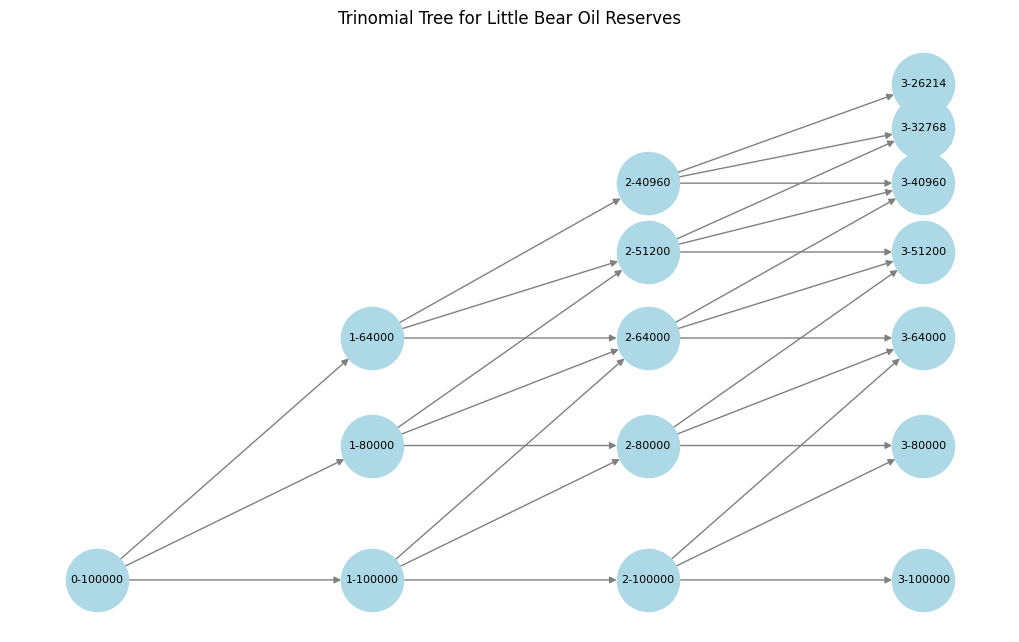

In [9]:
# Problem parameters
initial_reserves = 100_000  # Initial reserves in barrels
years = 3

# Pumping strategies
pump_options = {
    "no_pump": 0.0,   # No pumping
    "normal": 0.2,    # Normal pumping (20%)
    "enhanced": 0.36  # Enhanced pumping (36%)
}

# Create the graph
G = nx.DiGraph()

# Function to construct the trinomial tree
def build_tree(reserves, year, parent=None):
    """Recursively build the trinomial tree."""
    if year > years:
        return  # Stop at max depth
    
    node_label = f"{year}-{int(reserves)}"
    G.add_node(node_label, year=year, reserves=reserves)

    if parent:
        G.add_edge(parent, node_label)

    for strategy, extraction_rate in pump_options.items():
        new_reserves = reserves * (1 - extraction_rate)
        build_tree(new_reserves, year + 1, node_label)

# Build tree starting from initial reserves
build_tree(initial_reserves, 0)

# Position nodes based on their year
pos = {}
for node, data in G.nodes(data=True):
    year = data["year"]
    reserves = data["reserves"]
    pos[node] = (year, -reserves)  # X-axis: Year, Y-axis: Reserves (negative for better visualization)

# Draw the tree
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", font_size=8)
plt.title("Trinomial Tree for Little Bear Oil Reserves")
plt.show()

To finish this, we can evaluate all the outcomes in the end and find the best trategy.

In [10]:
# Problem parameters
initial_reserves = 100_000  # Initial reserves in barrels
years = 3
price_per_barrel = 10
cost_normal = 50_000
cost_enhanced = 120_000
discount_rate = 0.1

costs = {
    "no_pump": 0,
    "normal": cost_normal,
    "enhanced": cost_enhanced
}

# Pumping strategies
pump_options = {
    "no_pump": 0.0,   # No pumping
    "normal": 0.2,    # Normal pumping (20%)
    "enhanced": 0.36  # Enhanced pumping (36%)
}

def find_maximum_profit(reserves, year, profit):
    """Recursively find the maximum profit path."""
    if year > years:
        return profit
    
    max_profit = profit
    for strategy, extraction_rate in pump_options.items():
        new_reserves = reserves * (1 - extraction_rate)
        current_profit = reserves * extraction_rate * price_per_barrel - costs[strategy]
        discounted_profit = current_profit / (1 + discount_rate)**year
        total_profit = find_maximum_profit(new_reserves, year + 1, profit + discounted_profit)
        max_profit = max(max_profit, total_profit)
    
    return max_profit

# Calculate maximum profit
max_profit = find_maximum_profit(initial_reserves, 1, 0)
print(f"Maximum Profit: {max_profit*(1+discount_rate)}")

# Calculate the expected result
result = (initial_reserves * 0.36 * price_per_barrel - cost_enhanced) * (1 + discount_rate)**(-1) + \
         (initial_reserves * 0.36 * (1 - 0.36) * price_per_barrel - cost_enhanced) * (1 + discount_rate)**(-2) + \
         (initial_reserves * 0.2 * (1 - 0.36) * (1 - 0.36) * price_per_barrel - cost_normal) * (1 + discount_rate)**(-3)
print(f"Expected Result: {result*(1+discount_rate)}")

Maximum Profit: 366743.80165289255
Expected Result: 366743.80165289255
